In [2]:
import numpy as np
import cv2 
from skimage import io
import matplotlib.pyplot as plt
import math
from skimage.util import img_as_float
%matplotlib inline
# here we have imported all the required libraries
# Band Selection for Hyperspectral Image Classification Using Mutual Information 

Shape of original image: (720, 1280)


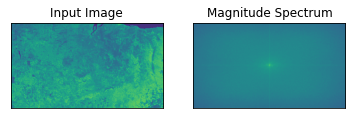

In [3]:
# then applying the Fourier algorithm, the code that you threw off, we got an image where the Magnitude Spectrum are visible
# it is this transformation of our dataset that will help us achieve the desired
input_img = cv2.imread('dataset.jpg',0)# open and read our dataset i.e. hyperspectral image
img_float32 = np.float32(input_img)
print('Shape of original image:',img_float32.shape)
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

ms_img = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))# a spectral image is created

plt.subplot(121),plt.imshow(input_img)
plt.savefig('dataset0.png')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(ms_img)
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()   

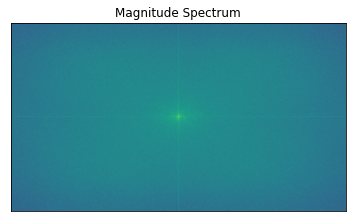

In [4]:
plt.imshow(ms_img)
plt.savefig('dataset1.png')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()# our 'Magnitude Spectrum' image before

In [5]:
ex_img=ms_img
image = img_as_float(ex_img)# here we are, thanks to the function that converts it to a float value, we got a float for each pixel
w = image.shape[0]

h = image.shape[1]
maxx=-100000000.1 # a value that will help us find the maximum float value of the pixels of our dataset
for i in range(w): 
    for j in range(h):
        if image[i][j]>maxx:# if the value of our image [i] [j] is greater than the maximum, we take it as a new maximum
                             # we are referring not to the dataset itself, but to its projection into the spectral
            maxx=image[i][j]
            print(i,j,maxx)
print("---------------------------")

for i in range(w):
    for j in range(h):
        if image[i][j]>=250:
            print(i,j,ms_img[i][j])# observing the highs, you took the value of the high spectrum as 250 for yourself and we want to see where we have the high spectra

0 0 124.411804
0 1 167.43463
0 9 174.56235
0 27 176.47408
0 35 178.61298
0 123 182.46423
0 145 184.24492
0 164 184.81042
0 165 189.2403
0 247 191.4089
0 278 191.89134
0 279 192.20148
0 281 195.2487
0 342 195.26859
0 601 197.9353
0 640 224.41801
7 640 224.51846
11 640 224.98282
17 640 225.15894
22 640 225.27374
23 640 225.56297
24 640 226.5402
58 640 228.53467
74 640 229.40167
79 640 229.48721
95 640 230.80376
96 640 232.13652
138 640 234.76837
165 640 236.70001
204 640 236.88148
272 640 240.85373
296 640 243.76416
313 640 244.43121
314 640 249.57603
325 640 252.62411
327 640 261.27075
339 640 263.53214
348 640 271.49536
349 640 273.38892
350 640 277.80737
351 640 279.64746
353 640 285.06445
355 640 286.2728
356 640 288.90866
357 640 293.96365
358 640 304.34335
359 640 317.93137
360 640 371.5161
---------------------------
325 640 252.62411
327 640 261.27075
328 640 254.73526
329 640 250.83266
330 640 250.40529
331 640 250.5185
332 640 253.8849
333 640 250.06746
334 640 253.60014
335 64

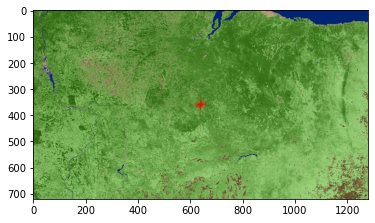

In [6]:
def drawPixels(image, location):
    x,y = location
    w,h=image.shape[0],image.shape[1]
    for row in range(20):
        for col in range(20):
            if(row+x)>=w:
                c=x
            else:
                c=row+x
            if(col+y)>=h:
                d=y
            else:
                d=col+y
            image[c][d] = [255, 0, 0]

    return image

def drawPixel(image, x, y):

    image[x][y] = [255, 0, 0]
    return image

imageArray = np.array(plt.imread('dataset.jpg'), dtype=np.uint8)


for i in range(w):
    for j in range(h):
        if image[i][j]>=250:
            drawPixel(imageArray,i,j)
            
plt.imshow(imageArray)

In [7]:
img=io.imread('dataset.jpg')  # we want to calculate the entropy so we read our dataset(our image) 
w = img.shape[0]
h = img.shape[1]
res = np.zeros((8,8,8)) 
def color2ind(pixel): 
    rind = math.floor(pixel[0]/32)
    gind = math.floor(pixel[1]/32)
    bind = math.floor(pixel[2]/32)
    return (rind,gind,bind)

pairEntropy={} # we created a pair to store the shades and its indices
for i in range(w):
    for j in range(h):
        if image[i][j]<250:
            rind,gind,bind = color2ind(img[i,j])
            res[rind,gind,bind] += 1# работа счетчика
            pairEntropy[str(rind)+" "+str(gind)+" "+str(bind)]=str(i)+"-"+str(j)# here we are already storing the shades as a key and its indices as a value
            
fres = res / res.sum()
fres_ = fres #fres_ is a copy of fres itself, which you will refer to in the future, since we will use such functions further
             # like .flatten () .nonzero () [0] we need to store it as a tuple 
fres=fres.flatten()
indexs = fres.nonzero()[0] # returns array as tuple
entropy = 0 
prob_list = fres.tolist() 
entropies=[] # array for storing the entropy value thanks to which we can find high values
for i in indexs: 
    entropy -= prob_list[i] * math.log2(prob_list[i]) 
    entropies.append(-1*prob_list[i] * math.log2(prob_list[i]))# add each entropy to our sheet
print("Entropy =", entropy)

Entropy = 3.6678534070867093


In [8]:
entropies.sort()# by sorting the list of entropy, we saw the values
minValueE=9.489937660769138e-05# and for ourselves we took this number as the minimum among the high, that is, we should choose only those
#which have high values
j=0
for i in entropies:# going throught the list, we saw what values we have that satisfy our conditions
    if i>minValueE:
        print(i)
        j+=1
print(j)

9.495051865900782e-05
9.495051865900782e-05
0.00011222715296593786
0.00011222715296593786
0.00012924150774442706
0.00012924150774442706
0.00012924150774442706
0.00012924150774442706
0.00012924150774442706
0.00012924150774442706
0.00012924150774442706
0.00012924150774442706
0.00014603133174310683
0.00014603133174310683
0.00014603133174310683
0.00014603133174310683
0.0001626248496773716
0.0001626248496773716
0.0001790439695297415
0.0001790439695297415
0.0001953061928963881
0.0001953061928963881
0.00021142582458594673
0.00021142582458594673
0.00024328312058527032
0.00024328312058527032
0.0002590394880087203
0.0002590394880087203
0.000290245261720139
0.000290245261720139
0.000290245261720139
0.000290245261720139
0.0003057069773358497
0.0003210816290340909
0.0003210816290340909
0.0003210816290340909
0.0003363738034829347
0.0003967946864800355
0.00041172926648081333
0.000456166451363373
0.0004708641232898295
0.0004708641232898295
0.0004708641232898295
0.0004708641232898295
0.0005146400931274

In [8]:
for i in pairEntropy.keys():# and here we already want to run through the dict and display the indices with a high level of entropy (high by our standards)
      # we described how our dict works above
    a,b,c=i.split(" ")# since, as the values, we took information about the shades, thanks to this we display the value of the key (that is, the pixel indices)
    if fres_[int(a),int(b),int(c)]>minValueE:
        print(pairEntropy[i])# here we see pixel indices with high entropy thanks to it it is not difficult to select a range
         # but for a more accurate calculation, you need to take into account mutual information

718-1158
719-364
719-218
719-1193
719-1267
719-110
719-1134
711-153
711-152
641-127
621-333
691-151
719-1224
719-1231
719-1244
719-1276
705-153
694-153
712-152
719-1243
719-1241
719-153
719-767
639-128
586-348
719-152
622-348
710-153
719-1225
719-681
719-1271
719-1278
719-1272
719-926
719-1277
719-1279
719-1188
719-155
719-1135
691-150
719-1247
719-1246
719-1235
719-1178
719-1194
718-1117
719-1182
716-603
715-150
640-127
639-129
718-666
719-1175
719-1266
718-742
692-151
714-1241
718-1190
658-791
638-129
719-1104
716-666
712-153
626-355
696-150
647-123
719-1240
719-1112
718-687
718-300
719-641
719-1234
719-584
718-1189
718-1237
715-528
719-1219
719-692
718-1084
718-1112
719-1242
719-1136


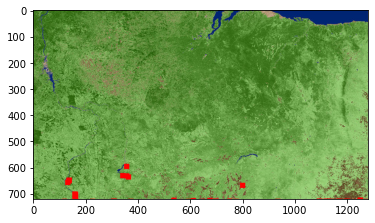

In [9]:
imageArrayE = np.array(plt.imread('dataset.jpg'), dtype=np.uint8)


for i in pairEntropy.keys():
    a,b,c=i.split(" ")
    if fres_[int(a),int(b),int(c)]>minValueE:
        indices=pairEntropy[i]
        x,y=indices.split("-")
        drawPixels(imageArrayE,(int(x),int(y)))
        
plt.imshow(imageArrayE)

In [10]:
pairJE={}# according to the same logic as above, we used dict, we take shades as a value and which pixels give such a shade, that is, their indices

res_je = np.zeros((8,8,8,8,8,8)) 
for i in range(w):
    for j in range(h):
        if image[i][j]<250:
            rind,gind,bind = color2ind(img[i,j])
            for di,dj in ((-1,-1),(-1,0),(-1,1),(0,-1),(0,1),(1,-1),(1,0),(1,1)):
                ii=i+di
                jj=j+dj
                if ii < 0 or ii >= w or jj < 0 or jj >= h:
                    continue
                if image[ii][jj]<250:
                    rind1,gind1,bind1 = color2ind(img[ii,jj])
                    res_je[rind,gind,bind,rind1,gind1,bind1] += 1
                    pairJE[str(rind)+" "+str(gind)+" "+str(bind)+" "+str(rind1)+" "+str(gind1)+" "+str(bind1)]=str(i)+"-"+str(j)+"-"+str(ii)+"-"+str(jj)
                # here we assign our value to the key
jEntrpopies=[] 
fres_je = res_je / res_je.sum()
fres_je_ = fres_je
fres_je = fres_je.flatten()
indexs_je = fres_je.nonzero()[0] 
j_entropy = 0
prob_list = fres_je.tolist()
for i in indexs_je:
    j_entropy -= prob_list[i] * math.log2(prob_list[i])
    jEntrpopies.append(-1*prob_list[i] * math.log2(prob_list[i]))
print("Joint entropy = ", j_entropy)

Joint entropy =  6.564691733766434


In [11]:
pairJE # checking our dict

{'0 1 0 1 3 1': '706-0-705-1',
 '0 1 0 0 1 0': '712-0-711-0',
 '0 1 0 3 4 2': '718-1158-717-1158',
 '1 3 1 0 1 0': '705-1-706-0',
 '1 3 1 1 3 0': '719-13-719-14',
 '1 3 1 3 4 2': '717-557-718-557',
 '1 3 1 4 5 2': '713-268-712-267',
 '1 3 0 1 3 1': '719-14-719-13',
 '1 3 0 1 3 0': '719-208-718-208',
 '1 3 0 3 4 2': '719-208-719-209',
 '1 3 0 4 5 2': '715-274-714-275',
 '1 3 0 4 6 3': '719-208-718-209',
 '1 3 1 1 3 1': '719-13-718-13',
 '1 3 1 4 6 3': '716-476-717-476',
 '1 3 1 3 5 3': '716-476-717-475',
 '1 3 1 1 2 0': '716-13-715-12',
 '1 2 0 1 3 1': '715-12-716-13',
 '1 2 0 1 2 0': '718-211-717-211',
 '1 2 0 3 5 3': '717-127-718-127',
 '1 2 0 3 4 2': '719-1193-718-1192',
 '1 2 0 2 4 2': '716-1097-717-1097',
 '1 2 0 3 5 2': '719-284-718-284',
 '1 2 0 2 3 1': '719-1168-718-1168',
 '1 2 0 4 6 3': '717-127-718-128',
 '2 3 1 1 2 0': '719-1127-719-1128',
 '2 3 1 3 5 2': '719-1267-718-1267',
 '2 3 1 4 6 3': '719-1267-719-1268',
 '2 3 1 4 5 3': '719-1267-718-1268',
 '1 2 0 4 5 3': '719-1162-

In [9]:
jEntrpopies.sort() 
minvalueJE=0.00030985129824991173 # as a high value chosen by yourself
for i in jEntrpopies:
    if i>minvalueJE:
        print(i)

NameError: name 'jEntrpopies' is not defined

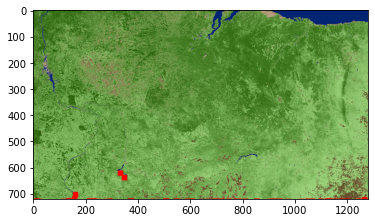

In [13]:
imageArrayJE = np.array(plt.imread('dataset.jpg'), dtype=np.uint8)
for i in pairJE.keys():
    a,b,c,d,e,f=i.split(" ")
    if fres_je_[int(a),int(b),int(c),int(d),int(e),int(f)]>minvalueJE:# display indices by shades
#         print(pairJE[i])
        indices=pairJE[i]
        x,y,z,k=indices.split("-")
        drawPixels(imageArrayJE,(int(x),int(y)))
        drawPixels(imageArrayJE,(int(z),int(k)))

plt.imshow(imageArrayJE)

In [14]:
mi = 0
miList=[]# also a sheet for storing the value of mutual information
pairMI={}# the same logic for storing key and value
for rind in range(8):
    for gind in range(8):
        for bind in range(8):# triple mileage from 0 to 8 because we divided our shades by 32 because otherwise
                             # storing such data would require very huge resources(memory)
            px = fres_[rind,gind,bind]# entropy for shades of the first pixel
            if px != 0:
                for rind1 in range(8):
                    for gind1 in range(8):
                        for bind1 in range(8):
                            pxy = fres_je_[rind,gind,bind,rind1,gind1,bind1]# joint entropy for these shades
                            py=fres_[rind1,gind1,bind1]# entropy for shades of the second pixel
                            if pxy != 0:# checking if there is a pair of such shades, so we automatically
                                 # check if there are such shades at all, that is, entropy
                                mi+=pxy*math.log2(pxy / (px*py))
                                miList.append(pxy*math.log2(pxy / (px*py)))
                                pairMI[pairJE[str(rind)+" "+str(gind)+" "+str(bind)+" "+str(rind1)+" "+str(gind1)+" "+str(bind1)]]=pxy*math.log2(pxy / (px*py))
                                # assigning a value to a key
print("Mutual information =",mi)

Mutual information = 0.7613649803353033


In [15]:
miList.sort()
minValueMI=0.00039749940972366244# we chose a high value
for i in miList:
    if i>minValueMI:
        print(i)# output mutual information that satisfies our conditions

0.0003977874956044305
0.0003977874956044305
0.0004009720403671348
0.0004009720403671348
0.0004022591611518834
0.0004022591611518834
0.00040984091099382597
0.00040984091099382597
0.0004111836284908606
0.0004111836284908606
0.00041765337671885797
0.0004188043659289975
0.0004188043659289975
0.0004190326923777574
0.0004190326923777574
0.0004241107943439176
0.00043124698448243165
0.00043124698448243165
0.00044358180048895336
0.00044358180048895336
0.00044371401853389117
0.00044371401853389117
0.00044507372126331235
0.00044507372126331235
0.0004472277453792235
0.0004472277453792235
0.0004473569224770391
0.0004473569224770391
0.0004639769334795897
0.0004925081877969433
0.0004925081877969433
0.0004983590681141284
0.0005027135719915118
0.0005027135719915118
0.0005421579363243684
0.0005421579363243684
0.0005470190619948981
0.0005470190619948981
0.0005593727056072745
0.00056579557984723
0.0005672702770200113
0.0005672702770200113
0.000575436864709475
0.000575436864709475
0.0005789066224848073
0.0

In [16]:
for i in pairMI.keys():
    if pairMI[i]>minValueMI:
        print(i)# output the indices of pairs of pixels with a high value

628-341-628-340
628-340-628-341
628-340-628-339
622-333-621-333
628-340-629-340
641-127-640-127
621-333-622-333
611-330-610-331
621-333-622-334
610-324-611-324
712-0-711-0
693-153-692-152
693-153-694-153
629-340-628-340
622-334-621-333
694-153-693-153
629-340-629-339
612-325-611-324
640-127-641-127
611-324-610-324
611-324-612-325
611-324-611-323
667-121-666-121
716-3-717-3
719-110-719-111
718-1243-718-1242
717-3-716-3
718-211-717-211
717-127-716-126
719-1168-718-1168
719-111-719-110
718-3-717-3
719-208-718-208
719-14-719-13
719-16-719-17
719-218-719-217
719-218-719-219
719-13-719-14
719-13-718-13
719-364-719-363
719-1222-718-1221
719-1241-718-1242
719-1233-719-1232
719-1241-719-1240
718-1242-718-1243
719-465-719-464
719-1143-718-1142
719-1143-719-1142
719-1224-718-1225
719-1143-718-1143
719-1223-718-1224
719-1231-719-1232
719-1226-718-1225
719-17-719-16
712-1258-712-1257
719-767-719-768
719-580-718-581
719-1127-719-1128
719-217-719-218
719-768-719-767
719-1127-718-1127
719-1184-719-118

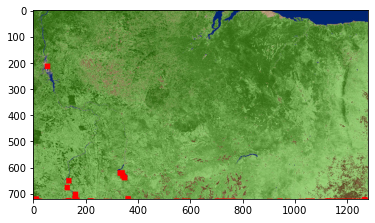

In [17]:
imageArrayMI = np.array(plt.imread('dataset.jpg'), dtype=np.uint8)
for i in pairMI.keys():
    if pairMI[i]>minValueMI:
        indices=i
        x,y,z,k=indices.split("-")
        drawPixels(imageArrayMI,(int(x),int(y)))
        drawPixels(imageArrayMI,(int(z),int(k)))

plt.imshow(imageArrayMI)

In [18]:
# the goal was to select bands with high associated MI values we also found bands for Shannon Entropy and Joint Entropy

In [19]:
#For Shannon entropy
#705 - 719   =  1030-1280,150-350,600-800
# 570-590,620-696 = 120-150,330-355

#For joint entropy
# 717-719,717-719  =  1030-1280,1030-1280;2-20,2-20;150-960,150-960
# 610-700  = 150-350,150-350


#For MI
# 717-719,717-719  =  1030-1280,1030-1280;110-965,110-960
# 610-650,610-650 = 120-350,120-350
# 710-719,710-719 = 0-20,0-20
# 205 , 45 =204 , 46

#our bands

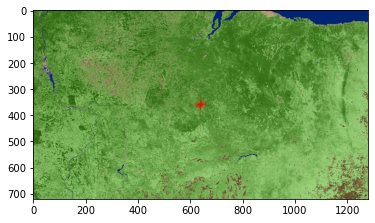

In [20]:
#high spectra
plt.imshow(imageArray)

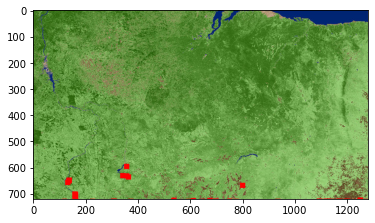

In [21]:
#high entropy
plt.imshow(imageArrayE)

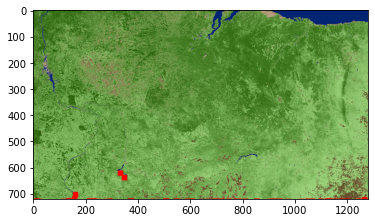

In [22]:
#high joint entropy
plt.imshow(imageArrayJE)

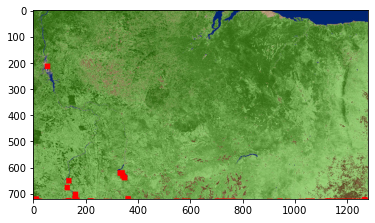

In [23]:
#high mutual information
plt.imshow(imageArrayMI)